In [1]:
import pandas as pd 
from pandas .plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
df = pd.read_excel('Airlines+Data.xlsx')

In [3]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
df.shape

(96, 2)

In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

<AxesSubplot:>

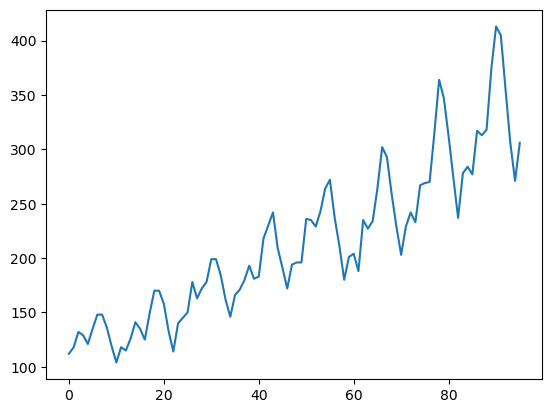

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
df.Passengers.plot()

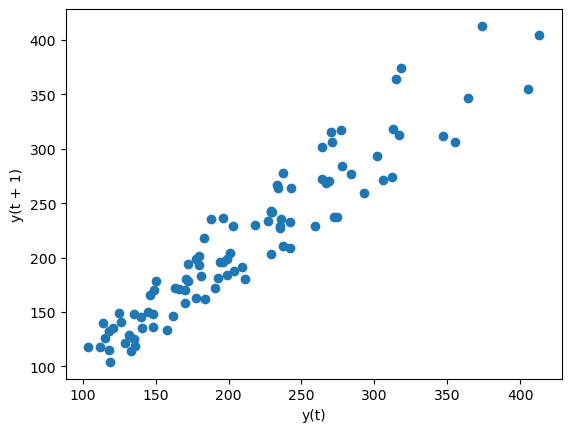

In [7]:
lag_plot(df['Passengers'])
plt.show()

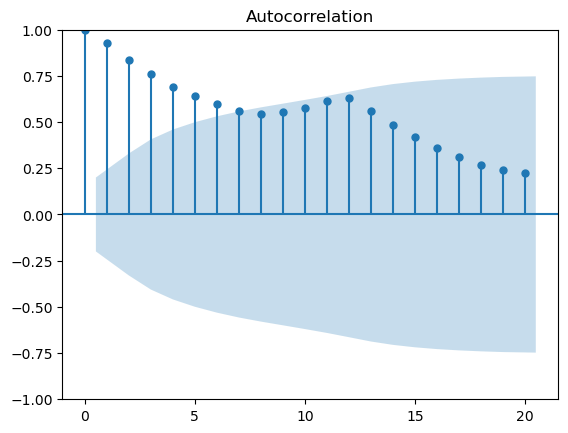

In [8]:
plot_acf(df['Passengers'])
plt.show()

In [9]:
df['month']=df.Month.dt.strftime("%b")
df['year']=df.Month.dt.strftime('%Y')

In [10]:
df

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [11]:
dummy=pd.DataFrame(pd.get_dummies(df['month']))
df = pd.concat([df,dummy],axis=1)
df.head()

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
df.head()

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='month', ylabel='year'>

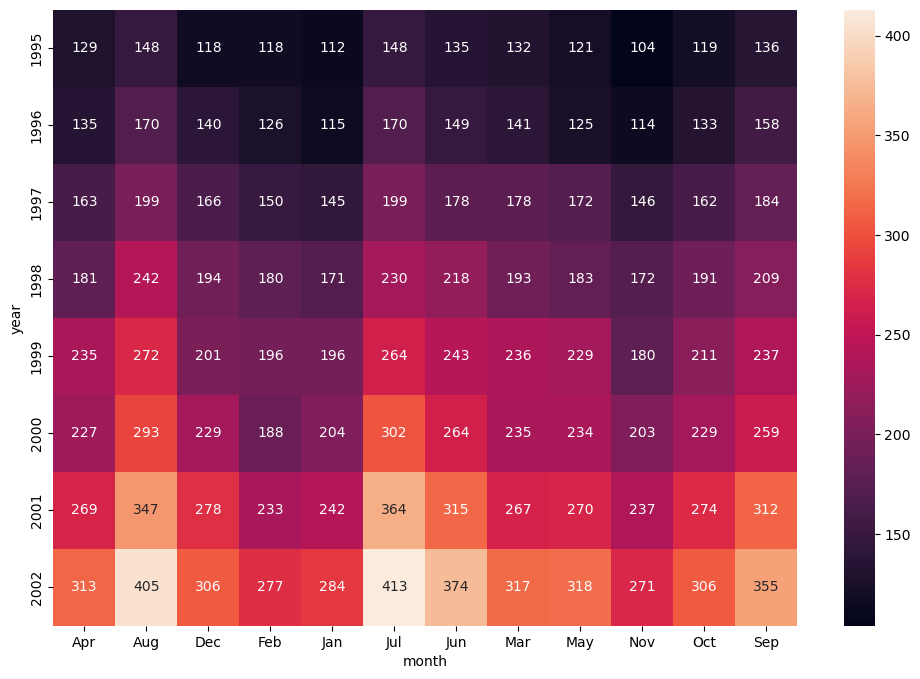

In [13]:
plt.figure(figsize=(12,8))
heatmap_month = pd.pivot_table(data=df,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_month,annot=True,fmt='g')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

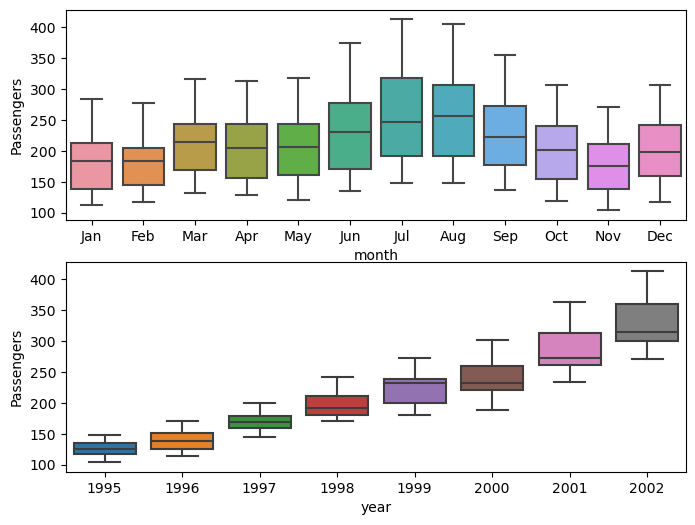

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=df)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

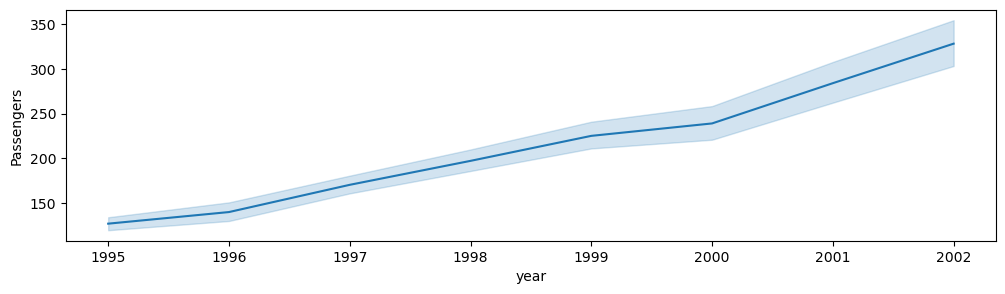

In [15]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

In [16]:
import numpy as np 
df['t']=range(1,97)
df['t_square']=df['t']*df['t']
df['log_passengers']=np.log(df['Passengers'])
df.head()

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


## Splitting Data

In [17]:
Train = df.head(86)
Test = df.tail(10)
Test

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_passengers
86,2002-03-01,317,Mar,2002,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,2002-04-01,313,Apr,2002,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,2002-05-01,318,May,2002,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,2002-06-01,374,Jun,2002,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,2002-07-01,413,Jul,2002,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119
95,2002-12-01,306,Dec,2002,0,0,1,0,0,0,0,0,0,0,0,0,96,9216,5.723585


In [18]:
## Linear model 
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data = Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.64314972778256

In [19]:
# Exponential 
Exp_model = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

49.90312334789315

In [20]:
# Quadratic 
quad_model = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_quad = pd.Series(quad_model.predict(Test[['t','t_square']]))
rmse_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

53.91436357852567

In [1]:
# Additive Seasonality 
add_sea = smf.ols('Passengers~Apr+Aug+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Apr','Aug','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

NameError: name 'smf' is not defined

In [22]:
# add Sea with Quadratic Trend 
add_sea_quad = smf.ols('Passengers~t+t_square+Apr+Aug+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(Test[['Apr','Aug','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

29.104549899231962

In [23]:
# Multiplicative Season 
mul_sea= smf.ols('log_passengers~Apr+Aug+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(Test))
rmse_mul_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

144.38493549461484

In [24]:
#Multiplicative Additive Seasonality
mul_add_sea = smf.ols('log_passengers~t+Apr+Aug+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(Test))
rmse_mul_add_sea= np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

11.264958330334599

In [25]:
# Comapre the Results 
data = {'Model':pd.Series(['rmse_linear','rmse_Exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea','rmse_mul_add_sea']),'Rmse_Values':pd.Series([rmse_linear,rmse_Exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['Rmse_Values'])

,Model,Rmse_Values
6,rmse_mul_add_sea,11.264958
4,rmse_add_sea_quad,29.104550
1,rmse_Exp,49.903123
2,rmse_quad,53.914364
0,rmse_linear,58.643150
3,rmse_add_sea,136.790104
5,rmse_mul_sea,144.384935


In [26]:
## Multiplicative Additive Seasonality can be Used for Forecasting Purpose...

## ARIMA

In [27]:
#!pip install pmdarima


In [28]:
from pmdarima.arima import auto_arima

In [29]:
model = auto_arima(Train['Passengers'],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)


 ARIMA(0,1,0)(0,1,0)[12]             : AIC=549.719, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=546.173, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=547.986, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=546.324, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=548.069, Time=0.21 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=547.859, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=546.640, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=544.315, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=545.522, Time=0.33 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=543.888, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=545.888, Time=0.21 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.69 sec
 ARIMA(0,1,1)(2,1,0)[12]  

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   86
Model:             SARIMAX(0, 1, 3)x(1, 1, [], 12)   Log Likelihood                -266.551
Date:                             Mon, 03 Jul 2023   AIC                            543.101
Time:                                     18:28:29   BIC                            554.553
Sample:                                          0   HQIC                           547.665
                                              - 86                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2741      0.121     -2.271      0.023      -0.511      -0.038
ma.L2          0.0517      0.141      0.365      0.715      -0.225       0.329
ma.L3         -0.2597      0.142     -1.834      0.067      -0.537       0.018
ar.S.L12      -0.2376      0.119     -2.004      0.045      -0.470      -0.005
sigma2        85.7280     14.794      5.795      0.000      56.732     114.724
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.95   Prob(JB):                         0.46
Heteroskedasticity (H):               2.13   Skew:                             0.36
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
def MAPE(pred,org):
    passenger = np.abs((pred-org))*100/org
    return np.mean(passenger)

In [32]:
pred_test = model.predict(n_periods=12)

In [33]:
MAPE(pred_test,Test.Passengers)

2.857341202770832

In [34]:
## SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
model_sa =SARIMAX(df['Passengers'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model_sa.fit()
df['forecast']=results.predict(start=5,end=200,dynamic=True)

<AxesSubplot:>

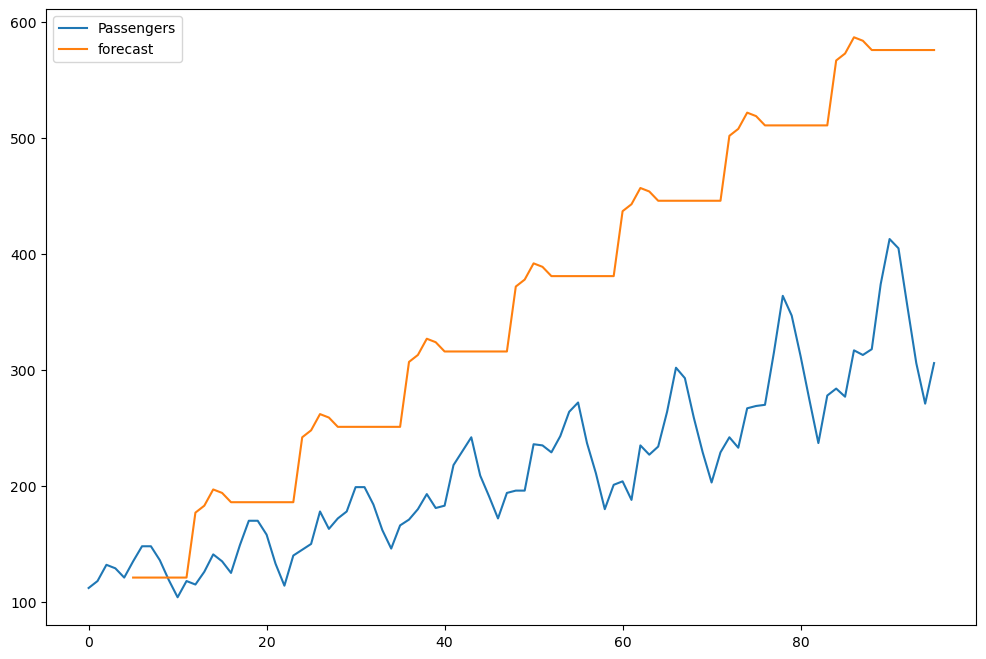

In [36]:
df[['Passengers','forecast']].plot(figsize=(12,8))

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -304.667
Date:                            Mon, 03 Jul 2023   AIC                            619.334
Time:                                    18:28:30   BIC                            631.428
Sample:                                         0   HQIC                           624.192
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6043      0.352     -1.717      0.086      -1.294       0.086
ma.L1          0.4003      0.391      1.023      0.306      -0.367       1.167
ar.S.L12      -0.3731      0.428     -0.872      0.383      -1.211       0.465
ma.S.L12       0.1537      0.481      0.319      0.749      -0.789       1.097
sigma2        89.5287     15.197      5.891      0.000      59.742     119.315
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.89   Prob(JB):                         0.39
Heteroskedasticity (H):               1.81   Skew:                             0.34
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""